<a href="https://colab.research.google.com/github/adewoleopeyemi/sexualharrammentanddomesticviolenceindicatoralgorithm/blob/master/SexualHarrasmentindicatorAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
from PIL import Image

rape_path = '/content/RapeTrain/'

In [ ]:
listing = os.listdir(path=rape_path)


rape_train_imgs = []
i = 0
for file in listing:
  try:
    img = Image.open(rape_path+file) 
    img = img.resize((124, 124))
    image = np.array(img, dtype='float16')/255.
    if image.shape==(124, 124, 3):
      rape_train_imgs.append(image)
    
    print(i)
    i+=1
  except:
    continue

In [3]:
len(rape_train_imgs)

3571

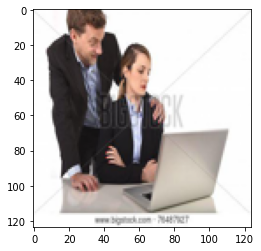

In [4]:
import matplotlib.pyplot as plt
plt.imshow(rape_train_imgs[1225].astype('float'))

In [5]:
rape_train_imgs = np.array(rape_train_imgs)

In [6]:
rape_train_imgs.shape

(3571, 124, 124, 3)

In [ ]:
non_rape_path = '/content/nonRapeTrain/'

listing = os.listdir(path=non_rape_path)
print(len(listing))

non_rape_train_imgs = []
i = 0
for x in listing:
  try:
    img = Image.open(non_rape_path+x)
    img = img.resize((124, 124))
    img = np.array(img, dtype='float16')/255.
    if img.shape==(124, 124, 3):
      non_rape_train_imgs.append(img)
    print(i)
    i+=1
  except:
    continue

In [8]:
len(non_rape_train_imgs)

3752

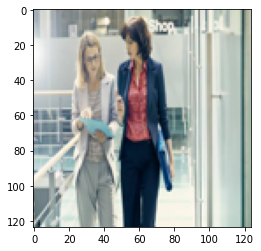

In [9]:
import matplotlib.pyplot as plt
plt.imshow(non_rape_train_imgs[1000].astype('float'))
non_rape_train_imgs = np.array(non_rape_train_imgs)

In [10]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [11]:
rape_target = np.zeros(len(rape_train_imgs))
non_rape_target = np.ones(len(non_rape_train_imgs))

In [12]:
rape_imgs = rape_train_imgs
non_rape_imgs = non_rape_train_imgs

In [13]:
train_size_rape = int(len(rape_train_imgs)*0.7)
train_size_non_rape = int(len(non_rape_train_imgs)*0.7)

X_train_rape = rape_imgs[:train_size_rape]
y_train_rape = rape_target[:train_size_rape]

X_train_non_rape = non_rape_imgs[:train_size_non_rape]
y_train_non_rape = non_rape_target[:train_size_non_rape]


X_test_rape = rape_imgs[train_size_rape:]
y_test_rape = rape_target[train_size_rape:]

X_test_non_rape = non_rape_imgs[train_size_non_rape:]

In [14]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top=False, 
                  input_shape =(124, 124, 3))


In [15]:
model = models.Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 15,894,849
Trainable params: 15,894,849
Non-trainable params: 0
_________________________________________________________________


In [17]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 124, 124, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 124, 124, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 124, 124, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 62, 62, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 62, 62, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 62, 62, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 31, 31, 128)       0     

In [18]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [19]:
X_train = np.concatenate([X_train_rape, X_train_non_rape])
y_train = np.concatenate([y_train_rape, y_train_non_rape])

In [22]:
history = model.fit(X_train, y_train, epochs = 2, batch_size=10, validation_split=0.1, shuffle=True)

Epoch 1/2
462/462 [==============================] - 30s 66ms/step - loss: 0.2022 - acc: 0.9157 - val_loss: 0.5056 - val_acc: 0.8051
Epoch 2/2
462/462 [==============================] - 30s 64ms/step - loss: 0.1134 - acc: 0.9582 - val_loss: 0.1335 - val_acc: 0.9610


In [25]:
y_test_non_rape = non_rape_target[train_size_non_rape:]

X_test = np.concatenate([X_test_rape, X_test_non_rape])
y_test = np.concatenate([y_test_rape, y_test_non_rape])

In [26]:
model.evaluate(X_test, y_test)

69/69 [==============================] - 3s 47ms/step - loss: 0.2713 - acc: 0.9054


[0.271331250667572, 0.9053685069084167]

In [29]:
test = X_test[10]

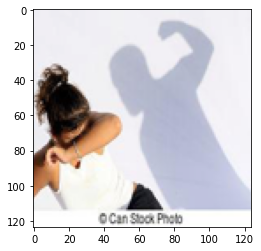

In [30]:
plt.imshow(test.astype(float))

In [32]:
prediction = model.predict(test.reshape(1, 124, 124, 3))
if prediction <= 0.5:
  print('This image contains either domestic violence or sexual harrasment')
else:
  print('This image doesn\'t contains either domestic violence or sexual harrasment')

This image contains either domestic violence or sexual harrasment


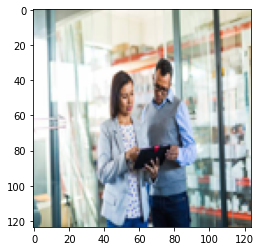

In [35]:
test2 = X_test[2195]
plt.imshow(test2.astype(float))

In [36]:
test2_prediction = model.predict(test2.reshape(1, 124, 124, 3))

In [37]:
if test2_prediction <= 0.5:
  print('This image contains either domestic violence or sexual harrasment')
else:
  print('This image doesn\'t contains either domestic violence or sexual harrasment')

This image doesn't contains either domestic violence or sexual harrasment


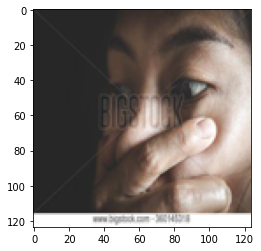

In [40]:
test3 = X_test[38]
plt.imshow(test3.astype(float))

In [42]:
test3_prediction = model.predict(test3.reshape(1, 124, 124, 3))

In [43]:
if test3_prediction <= 0.5:
  print('This image contains either domestic violence or sexual harrasment')
else:
  print('This image doesn\'t contains either domestic violence or sexual harrasment')

This image contains either domestic violence or sexual harrasment


This image doesn't contains either domestic violence or sexual harrasment


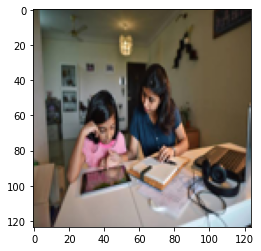

In [45]:
test4 = X_test[1988]
plt.imshow(test4.astype(float))
test4_prediction = model.predict(test4.reshape(1, 124, 124, 3))
if test4_prediction <= 0.5:
  print('This image contains either domestic violence or sexual harrasment')
else:
  print('This image doesn\'t contains either domestic violence or sexual harrasment')

This image contains either domestic violence or sexual harrasment


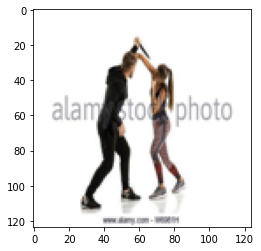

In [46]:
test5 = X_test[100]
plt.imshow(test5.astype(float))
test5_prediction = model.predict(test5.reshape(1, 124, 124, 3))
if test5_prediction <= 0.5:
  print('This image contains either domestic violence or sexual harrasment')
else:
  print('This image doesn\'t contains either domestic violence or sexual harrasment')

This image doesn't contains either domestic violence or sexual harrasment


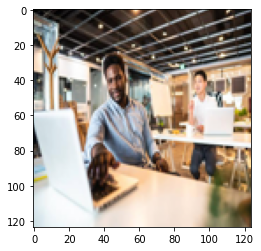

In [47]:
test6 = X_test[1685]
plt.imshow(test6.astype(float))
test6_prediction = model.predict(test6.reshape(1, 124, 124, 3))
if test6_prediction <= 0.5:
  print('This image contains either domestic violence or sexual harrasment')
else:
  print('This image doesn\'t contains either domestic violence or sexual harrasment')

This image contains either domestic violence or sexual harrasment


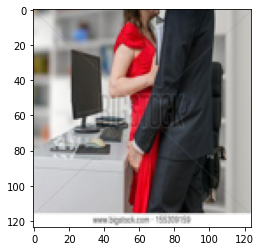

In [48]:
test7 = X_test[28]
plt.imshow(test7.astype(float))
test7_prediction = model.predict(test7.reshape(1, 124, 124, 3))
if test7_prediction <= 0.5:
  print('This image contains either domestic violence or sexual harrasment')
else:
  print('This image doesn\'t contains either domestic violence or sexual harrasment')

This image doesn't contains either domestic violence or sexual harrasment


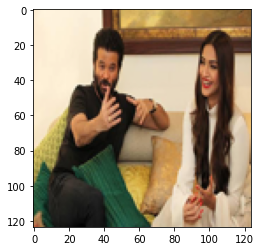

In [50]:
test8 = X_test[1193]
plt.imshow(test8.astype(float))
test8_prediction = model.predict(test8.reshape(1, 124, 124, 3))
if test8_prediction <= 0.5:
  print('This image contains either domestic violence or sexual harrasment')
else:
  print('This image doesn\'t contains either domestic violence or sexual harrasment')

This image contains either domestic violence or sexual harrasment


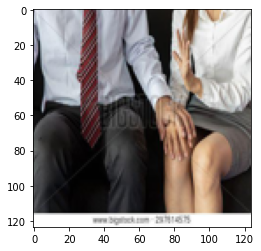

In [55]:
test9 = X_test[15]
plt.imshow(test9.astype(float))
test9_prediction = model.predict(test9.reshape(1, 124, 124, 3))
if test9_prediction <= 0.5:
  print('This image contains either domestic violence or sexual harrasment')
else:
  print('This image doesn\'t contains either domestic violence or sexual harrasment')

In [56]:
model.save('sexualharrasmentandindicationalgorithm.h5')